<a href="https://colab.research.google.com/github/mijanr/GANs/blob/master/cGAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#necessary imports
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
import torchvision.transforms as transforms 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm, trange

In [2]:
#set a fixed image size
sns.set(rc={'image.cmap':'gray', 'figure.figsize':(12,10)})
sns.set_style("darkgrid")

In [3]:
#load the dataset
dataset = datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
#dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=True)

In [5]:
#plot a grid of images
def plot_grid(images):
    grid = torchvision.utils.make_grid(images)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.show()

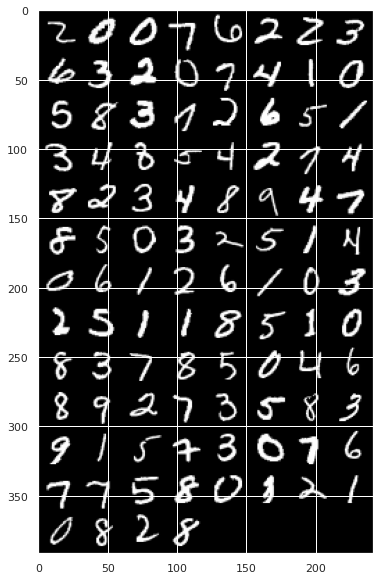

In [6]:
#plot a grid of images
plot_grid(next(iter(dataloader))[0])

In [7]:
#Let's create a Conditional GAN
#Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.embedding = nn.Embedding(10, 10)
        self.sequential = nn.Sequential(
            nn.Linear(110, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
    def forward(self, z, labels):
        c = self.embedding(labels)
        x = torch.cat([z, c], 1)
        return self.sequential(x)#.view(-1, 1, 28, 28)
#Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.embedding = nn.Embedding(10, 10)
        self.sequential = nn.Sequential(
            nn.Linear(794, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x, labels):
        c = self.embedding(labels)
        x = torch.cat([x, c], 1)
        return self.sequential(x)

In [8]:
gen = Generator()
disc = Discriminator()

In [9]:
X = torch.randn(10, 100)
print(X.shape)
labels = torch.randint(0, 10, (10,))
out = gen(X, labels)
print(out.shape)

torch.Size([10, 100])
torch.Size([10, 784])


In [10]:
disc(out, labels)

tensor([[0.5173],
        [0.5118],
        [0.5126],
        [0.5100],
        [0.5142],
        [0.5138],
        [0.5173],
        [0.5124],
        [0.5173],
        [0.5146]], grad_fn=<SigmoidBackward0>)

In [11]:
#optimizer
opt_gen = torch.optim.Adam(gen.parameters(), lr=0.0002)
opt_disc = torch.optim.Adam(disc.parameters(), lr=0.0002)
#loss function
loss = nn.BCELoss()

In [12]:
for real, labels in dataloader:
    print(real.shape)
    print(labels.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


100%|██████████| 600/600 [00:56<00:00, 10.61it/s]


Epoch 1/100, Loss D: 1.3812, Loss G: 2.2546


100%|██████████| 600/600 [00:51<00:00, 11.65it/s]


Epoch 2/100, Loss D: 0.4667, Loss G: 1.8861


100%|██████████| 600/600 [00:49<00:00, 12.05it/s]


Epoch 3/100, Loss D: 0.5476, Loss G: 2.3502


100%|██████████| 600/600 [00:49<00:00, 12.19it/s]


Epoch 4/100, Loss D: 0.9434, Loss G: 1.8878


100%|██████████| 600/600 [00:49<00:00, 12.15it/s]


Epoch 5/100, Loss D: 0.5893, Loss G: 2.2129


100%|██████████| 600/600 [00:50<00:00, 11.95it/s]


Epoch 6/100, Loss D: 0.6689, Loss G: 1.1865


100%|██████████| 600/600 [00:49<00:00, 12.02it/s]


Epoch 7/100, Loss D: 0.7382, Loss G: 1.4229


100%|██████████| 600/600 [00:50<00:00, 11.99it/s]


Epoch 8/100, Loss D: 0.7137, Loss G: 2.3869


100%|██████████| 600/600 [00:49<00:00, 12.07it/s]


Epoch 9/100, Loss D: 0.8437, Loss G: 2.2938


100%|██████████| 600/600 [00:50<00:00, 11.99it/s]


Epoch 10/100, Loss D: 0.8378, Loss G: 1.6138


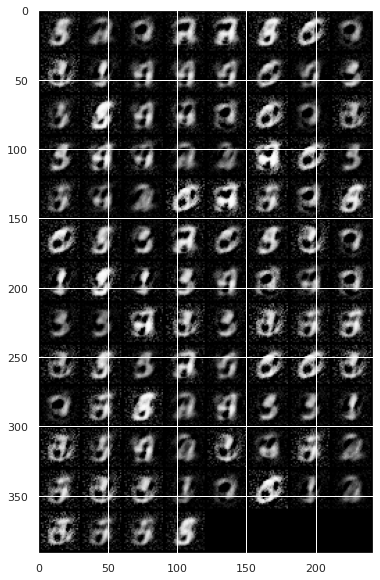

100%|██████████| 600/600 [00:50<00:00, 12.00it/s]


Epoch 11/100, Loss D: 1.1340, Loss G: 1.0171


100%|██████████| 600/600 [00:49<00:00, 12.06it/s]


Epoch 12/100, Loss D: 0.7268, Loss G: 1.3386


100%|██████████| 600/600 [00:49<00:00, 12.12it/s]


Epoch 13/100, Loss D: 0.9903, Loss G: 1.2684


100%|██████████| 600/600 [00:49<00:00, 12.05it/s]


Epoch 14/100, Loss D: 1.3808, Loss G: 1.2692


100%|██████████| 600/600 [00:50<00:00, 11.92it/s]


Epoch 15/100, Loss D: 0.7528, Loss G: 1.8382


100%|██████████| 600/600 [00:49<00:00, 12.08it/s]


Epoch 16/100, Loss D: 1.0490, Loss G: 2.0722


100%|██████████| 600/600 [00:49<00:00, 12.19it/s]


Epoch 17/100, Loss D: 1.0432, Loss G: 1.4166


100%|██████████| 600/600 [00:49<00:00, 12.14it/s]


Epoch 18/100, Loss D: 1.0240, Loss G: 1.9286


100%|██████████| 600/600 [00:50<00:00, 11.90it/s]


Epoch 19/100, Loss D: 1.1967, Loss G: 1.7198


100%|██████████| 600/600 [00:49<00:00, 12.16it/s]


Epoch 20/100, Loss D: 0.9427, Loss G: 1.1160


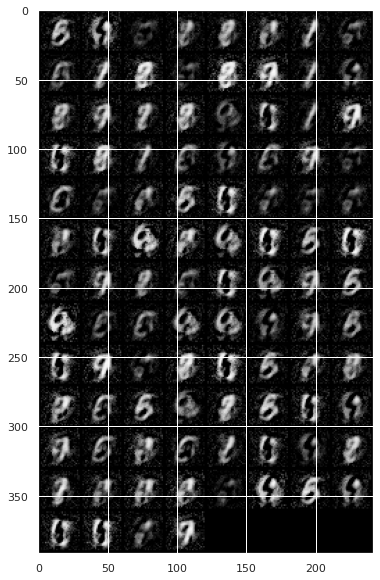

100%|██████████| 600/600 [00:50<00:00, 11.96it/s]


Epoch 21/100, Loss D: 1.2428, Loss G: 1.3828


100%|██████████| 600/600 [00:49<00:00, 12.08it/s]


Epoch 22/100, Loss D: 1.0783, Loss G: 1.4473


100%|██████████| 600/600 [00:50<00:00, 11.81it/s]


Epoch 23/100, Loss D: 0.7882, Loss G: 2.3912


100%|██████████| 600/600 [00:49<00:00, 12.06it/s]


Epoch 24/100, Loss D: 1.0709, Loss G: 1.7034


100%|██████████| 600/600 [00:49<00:00, 12.23it/s]


Epoch 25/100, Loss D: 0.6257, Loss G: 1.9867


100%|██████████| 600/600 [00:49<00:00, 12.01it/s]


Epoch 26/100, Loss D: 0.6296, Loss G: 2.3125


100%|██████████| 600/600 [00:50<00:00, 11.97it/s]


Epoch 27/100, Loss D: 0.8317, Loss G: 1.5166


100%|██████████| 600/600 [00:49<00:00, 12.18it/s]


Epoch 28/100, Loss D: 0.7520, Loss G: 2.4547


100%|██████████| 600/600 [00:49<00:00, 12.14it/s]


Epoch 29/100, Loss D: 0.7107, Loss G: 2.4531


100%|██████████| 600/600 [00:49<00:00, 12.23it/s]


Epoch 30/100, Loss D: 1.1542, Loss G: 1.3637


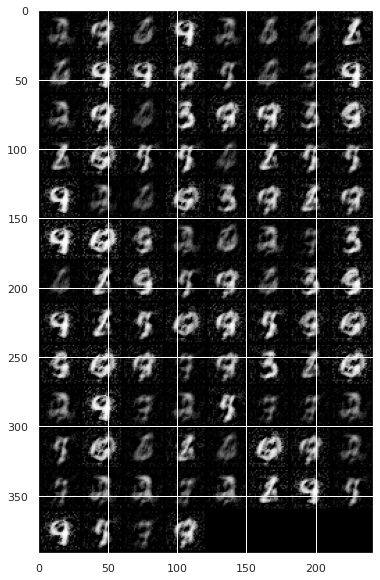

100%|██████████| 600/600 [00:49<00:00, 12.13it/s]


Epoch 31/100, Loss D: 0.8950, Loss G: 1.8802


100%|██████████| 600/600 [00:50<00:00, 11.97it/s]


Epoch 32/100, Loss D: 0.8489, Loss G: 1.7583


100%|██████████| 600/600 [00:48<00:00, 12.25it/s]


Epoch 33/100, Loss D: 1.0289, Loss G: 1.6598


100%|██████████| 600/600 [00:49<00:00, 12.10it/s]


Epoch 34/100, Loss D: 0.7930, Loss G: 1.5524


100%|██████████| 600/600 [00:49<00:00, 12.22it/s]


Epoch 35/100, Loss D: 0.7306, Loss G: 1.3186


100%|██████████| 600/600 [00:50<00:00, 11.97it/s]


Epoch 36/100, Loss D: 0.5886, Loss G: 2.2219


100%|██████████| 600/600 [00:49<00:00, 12.22it/s]


Epoch 37/100, Loss D: 0.8924, Loss G: 1.6492


100%|██████████| 600/600 [00:48<00:00, 12.27it/s]


Epoch 38/100, Loss D: 0.6845, Loss G: 1.7386


100%|██████████| 600/600 [00:49<00:00, 12.02it/s]


Epoch 39/100, Loss D: 0.7441, Loss G: 2.1450


100%|██████████| 600/600 [00:50<00:00, 11.84it/s]


Epoch 40/100, Loss D: 0.8605, Loss G: 1.8608


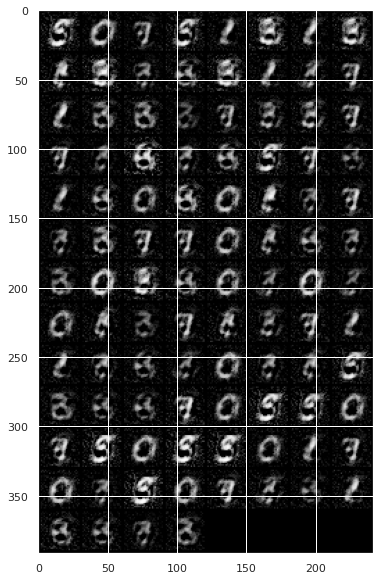

100%|██████████| 600/600 [00:49<00:00, 12.12it/s]


Epoch 41/100, Loss D: 0.8293, Loss G: 1.6638


100%|██████████| 600/600 [00:49<00:00, 12.12it/s]


Epoch 42/100, Loss D: 0.6401, Loss G: 2.2104


100%|██████████| 600/600 [00:49<00:00, 12.02it/s]


Epoch 43/100, Loss D: 0.7499, Loss G: 2.1733


100%|██████████| 600/600 [00:51<00:00, 11.72it/s]


Epoch 44/100, Loss D: 0.7321, Loss G: 1.8507


100%|██████████| 600/600 [00:50<00:00, 11.93it/s]


Epoch 45/100, Loss D: 0.8281, Loss G: 1.5840


100%|██████████| 600/600 [00:49<00:00, 12.02it/s]


Epoch 46/100, Loss D: 0.7627, Loss G: 1.8173


100%|██████████| 600/600 [00:49<00:00, 12.05it/s]


Epoch 47/100, Loss D: 0.6529, Loss G: 2.5871


100%|██████████| 600/600 [00:49<00:00, 12.13it/s]


Epoch 48/100, Loss D: 0.5499, Loss G: 2.5290


100%|██████████| 600/600 [00:50<00:00, 11.96it/s]


Epoch 49/100, Loss D: 0.7014, Loss G: 2.3661


100%|██████████| 600/600 [00:49<00:00, 12.18it/s]


Epoch 50/100, Loss D: 0.6456, Loss G: 2.4371


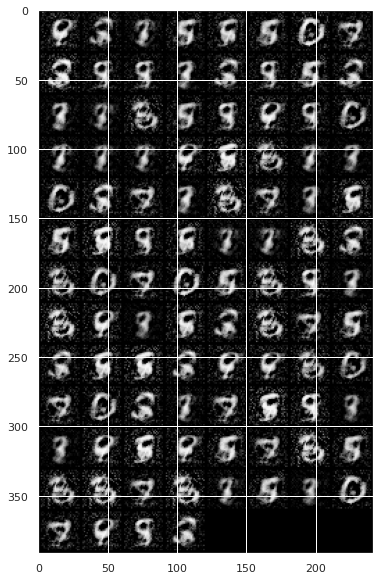

100%|██████████| 600/600 [00:49<00:00, 12.13it/s]


Epoch 51/100, Loss D: 0.6120, Loss G: 2.5786


100%|██████████| 600/600 [00:50<00:00, 11.89it/s]


Epoch 52/100, Loss D: 0.4210, Loss G: 3.0616


100%|██████████| 600/600 [00:52<00:00, 11.43it/s]


Epoch 53/100, Loss D: 0.6477, Loss G: 2.2339


100%|██████████| 600/600 [00:50<00:00, 11.81it/s]


Epoch 54/100, Loss D: 0.6556, Loss G: 1.8929


100%|██████████| 600/600 [00:51<00:00, 11.66it/s]


Epoch 55/100, Loss D: 0.6273, Loss G: 2.1898


100%|██████████| 600/600 [00:52<00:00, 11.43it/s]


Epoch 56/100, Loss D: 0.6422, Loss G: 2.6957


100%|██████████| 600/600 [00:52<00:00, 11.52it/s]


Epoch 57/100, Loss D: 0.5165, Loss G: 2.1354


100%|██████████| 600/600 [00:50<00:00, 11.77it/s]


Epoch 58/100, Loss D: 0.5094, Loss G: 2.2718


100%|██████████| 600/600 [00:51<00:00, 11.75it/s]


Epoch 59/100, Loss D: 0.6595, Loss G: 2.7583


100%|██████████| 600/600 [00:50<00:00, 11.77it/s]


Epoch 60/100, Loss D: 0.6656, Loss G: 2.8257


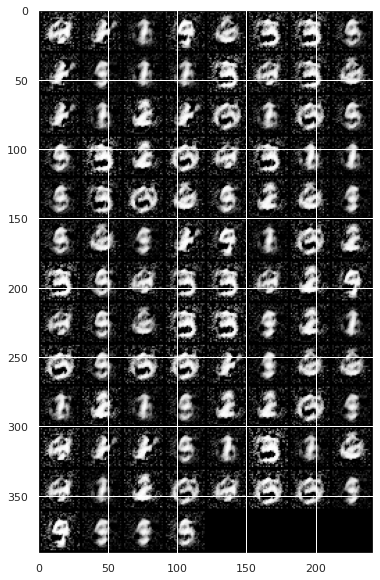

100%|██████████| 600/600 [00:51<00:00, 11.59it/s]


Epoch 61/100, Loss D: 0.6330, Loss G: 2.1498


100%|██████████| 600/600 [00:51<00:00, 11.71it/s]


Epoch 62/100, Loss D: 0.5922, Loss G: 1.9941


100%|██████████| 600/600 [00:50<00:00, 11.77it/s]


Epoch 63/100, Loss D: 0.7568, Loss G: 2.6559


100%|██████████| 600/600 [00:51<00:00, 11.75it/s]


Epoch 64/100, Loss D: 0.4978, Loss G: 2.5556


100%|██████████| 600/600 [00:50<00:00, 11.77it/s]


Epoch 65/100, Loss D: 0.2958, Loss G: 2.4434


100%|██████████| 600/600 [00:51<00:00, 11.67it/s]


Epoch 66/100, Loss D: 0.5354, Loss G: 2.7511


100%|██████████| 600/600 [00:51<00:00, 11.73it/s]


Epoch 67/100, Loss D: 0.5652, Loss G: 3.4991


100%|██████████| 600/600 [00:51<00:00, 11.71it/s]


Epoch 68/100, Loss D: 0.6019, Loss G: 2.4616


100%|██████████| 600/600 [00:51<00:00, 11.70it/s]


Epoch 69/100, Loss D: 0.5625, Loss G: 2.6519


100%|██████████| 600/600 [00:52<00:00, 11.51it/s]


Epoch 70/100, Loss D: 0.4837, Loss G: 2.6244


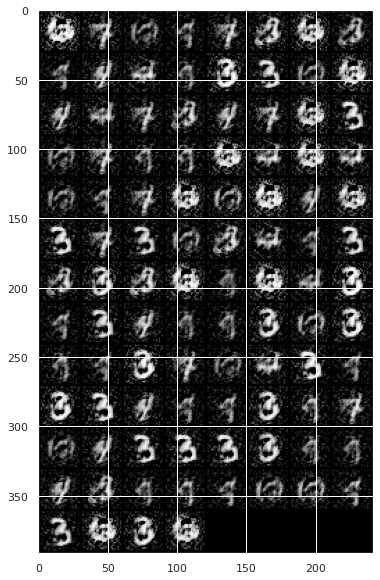

100%|██████████| 600/600 [00:51<00:00, 11.62it/s]


Epoch 71/100, Loss D: 0.4088, Loss G: 2.3417


100%|██████████| 600/600 [00:50<00:00, 11.86it/s]


Epoch 72/100, Loss D: 0.5241, Loss G: 2.4965


100%|██████████| 600/600 [00:49<00:00, 12.01it/s]


Epoch 73/100, Loss D: 0.4529, Loss G: 2.8914


100%|██████████| 600/600 [00:51<00:00, 11.67it/s]


Epoch 74/100, Loss D: 0.3509, Loss G: 2.2541


100%|██████████| 600/600 [00:50<00:00, 11.84it/s]


Epoch 75/100, Loss D: 0.4110, Loss G: 3.0963


100%|██████████| 600/600 [00:50<00:00, 11.85it/s]


Epoch 76/100, Loss D: 0.3843, Loss G: 3.6510


100%|██████████| 600/600 [00:50<00:00, 11.85it/s]


Epoch 77/100, Loss D: 0.4619, Loss G: 3.3543


100%|██████████| 600/600 [00:50<00:00, 11.85it/s]


Epoch 78/100, Loss D: 0.5404, Loss G: 2.8095


100%|██████████| 600/600 [00:50<00:00, 11.98it/s]


Epoch 79/100, Loss D: 0.3558, Loss G: 3.0193


100%|██████████| 600/600 [00:49<00:00, 12.12it/s]


Epoch 80/100, Loss D: 0.3774, Loss G: 3.2130


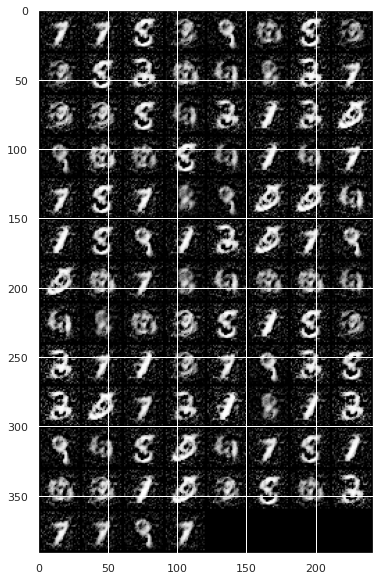

100%|██████████| 600/600 [00:50<00:00, 11.84it/s]


Epoch 81/100, Loss D: 0.3290, Loss G: 3.1825


100%|██████████| 600/600 [00:51<00:00, 11.71it/s]


Epoch 82/100, Loss D: 0.7352, Loss G: 2.9779


100%|██████████| 600/600 [00:52<00:00, 11.50it/s]


Epoch 83/100, Loss D: 0.2749, Loss G: 3.2219


100%|██████████| 600/600 [00:50<00:00, 11.81it/s]


Epoch 84/100, Loss D: 0.3854, Loss G: 2.9649


100%|██████████| 600/600 [00:50<00:00, 11.82it/s]


Epoch 85/100, Loss D: 0.5223, Loss G: 3.2979


100%|██████████| 600/600 [00:50<00:00, 11.83it/s]


Epoch 86/100, Loss D: 0.4385, Loss G: 3.4525


100%|██████████| 600/600 [00:52<00:00, 11.54it/s]


Epoch 87/100, Loss D: 0.4150, Loss G: 2.9601


100%|██████████| 600/600 [00:50<00:00, 11.78it/s]


Epoch 88/100, Loss D: 0.4352, Loss G: 2.4823


100%|██████████| 600/600 [00:50<00:00, 11.86it/s]


Epoch 89/100, Loss D: 0.4649, Loss G: 2.6238


100%|██████████| 600/600 [00:52<00:00, 11.47it/s]


Epoch 90/100, Loss D: 0.3894, Loss G: 3.0412


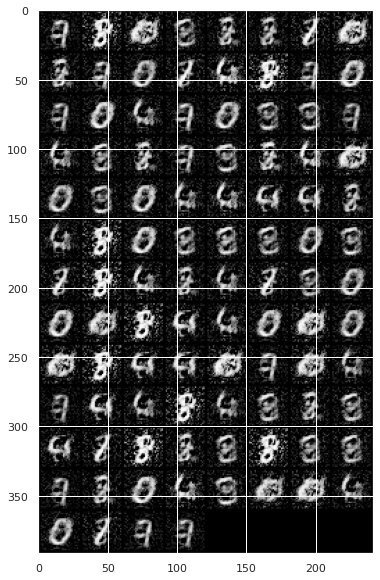

100%|██████████| 600/600 [00:52<00:00, 11.40it/s]


Epoch 91/100, Loss D: 0.3752, Loss G: 2.8913


100%|██████████| 600/600 [00:51<00:00, 11.69it/s]


Epoch 92/100, Loss D: 0.3140, Loss G: 4.6718


100%|██████████| 600/600 [00:51<00:00, 11.66it/s]


Epoch 93/100, Loss D: 0.4695, Loss G: 3.2702


100%|██████████| 600/600 [00:51<00:00, 11.68it/s]


Epoch 94/100, Loss D: 0.2924, Loss G: 2.9315


100%|██████████| 600/600 [00:51<00:00, 11.68it/s]


Epoch 95/100, Loss D: 0.3606, Loss G: 3.4863


100%|██████████| 600/600 [00:52<00:00, 11.49it/s]


Epoch 96/100, Loss D: 0.4349, Loss G: 2.6387


100%|██████████| 600/600 [00:51<00:00, 11.70it/s]


Epoch 97/100, Loss D: 0.4721, Loss G: 3.4502


100%|██████████| 600/600 [00:51<00:00, 11.75it/s]


Epoch 98/100, Loss D: 0.4765, Loss G: 3.8649


100%|██████████| 600/600 [00:51<00:00, 11.66it/s]


Epoch 99/100, Loss D: 0.1933, Loss G: 3.2808


100%|██████████| 600/600 [00:51<00:00, 11.57it/s]


Epoch 100/100, Loss D: 0.4745, Loss G: 3.4664


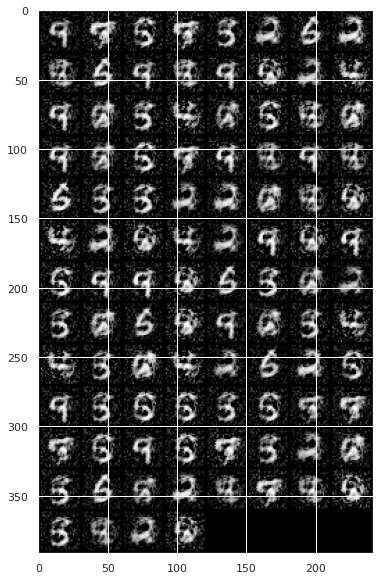

In [13]:
#training
epochs = 100
for epoch in range(epochs):
    for real, labels in tqdm(dataloader):
        #real = real.view(-1, 784)
        real = real.view(-1, 784)
        #training discriminator
        opt_disc.zero_grad()
        #real
        D_real = disc(real, labels)
        loss_real = loss(D_real, torch.ones_like(D_real))
        #fake
        z = torch.randn(100, 100)
        fake_labels = torch.randint(0, 10, (100,))
        fake = gen(z, fake_labels)
        D_fake = disc(fake.detach(), fake_labels)
        loss_fake = loss(D_fake, torch.zeros_like(D_fake))
        #total loss
        loss_disc = loss_real + loss_fake
        loss_disc.backward()
        opt_disc.step()
        #training generator
        opt_gen.zero_grad()
        D_fake = disc(fake, fake_labels)
        loss_gen = loss(D_fake, torch.ones_like(D_fake))
        loss_gen.backward()
        opt_gen.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss D: {loss_disc.item():.4f}, Loss G: {loss_gen.item():.4f}")
    #plot fake images after every 10 epochs
    if (epoch+1)%10 == 0:
        plot_grid(fake.view(-1, 1, 28, 28).detach())
    

In [1]:
#generate images
z = torch.randn(100, 100)
labels = torch.randint(6, 7, (100,))
#generate images
fake = gen(z, labels)
plot_grid(fake.view(-1, 1, 28, 28).detach())

NameError: ignored